<a href="https://colab.research.google.com/github/Nongbon/Stat_Learning_for_Data_Sci/blob/main/Bagging_RF_AdaBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 05**

---


In [6]:
%%capture
!git clone https://github.com/Nongbon/Stat_Learning_for_Data_Sci.git

In [7]:
import numpy as np
import pandas as pd

noT = range(1, 102)
paths = [
    "/content/Stat_Learning_for_Data_Sci/Data/X_train.csv",
    "/content/Stat_Learning_for_Data_Sci/Data/X_test.csv",
    "/content/Stat_Learning_for_Data_Sci/Data/y_train.csv",
    "/content/Stat_Learning_for_Data_Sci/Data/y_test.csv"
]


X_train = pd.read_csv(paths[0], header=None)
X_test = pd.read_csv(paths[1], header=None)
y_train = pd.read_csv(paths[2], header=None)
y_test = pd.read_csv(paths[3], header=None)

# Bagging

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_sample = X_train.shape[0] # 212
arr = []
for j in range(10): # find the average of 10 accuracies
    accuracy = []
    for nE in noT:
        votes = []
        for nS in range(nE):
            indexs = np.random.choice(n_sample, n_sample).tolist()
            X_sample, y_sample = X_train.iloc[indexs], y_train.iloc[indexs]

            clf = DecisionTreeClassifier(
                criterion="entropy",
                max_depth=3
            )

            clf.fit(X_sample, y_sample.to_numpy().ravel())
            y_pred = clf.predict(X_test)
            votes.append(y_pred)
    
        votes = np.array(votes)
        y_pred = np.mean(votes, axis=0)
        func = np.vectorize(
            lambda x: int(x > 0.5)
        )
        y_pred = func(y_pred)
    
        score = accuracy_score(y_test, y_pred)
        accuracy.append(score)

    arr.append(accuracy)

arr = np.array(arr)
accuracy1 = np.mean(arr, axis=0)

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

arr = []
for i in range(10): # find the average of 10 accuracies
    accuracy = []
    for nE in noT:
        clf = RandomForestClassifier(
            criterion="entropy", 
            max_depth=3, 
            max_features=4,
            n_estimators=nE
        )
        
        clf.fit(X_train, y_train.to_numpy().ravel())
        score = clf.score(X_test, y_test)
        accuracy.append(score)
    arr.append(accuracy)

arr = np.array(arr)
accuracy2 = np.mean(arr, axis=0)

# AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

arr = []
for i in range(10): # find the average of 10 accuracies
    accuracy = []
    for nE in noT:
        clf = AdaBoostClassifier(
            n_estimators=nE
        )
        
        clf.fit(X_train, y_train.to_numpy().ravel())
        score = clf.score(X_test, y_test)
        accuracy.append(score)
    arr.append(accuracy)

arr = np.array(arr)
accuracy3 = np.mean(arr, axis=0)

# Conclusion

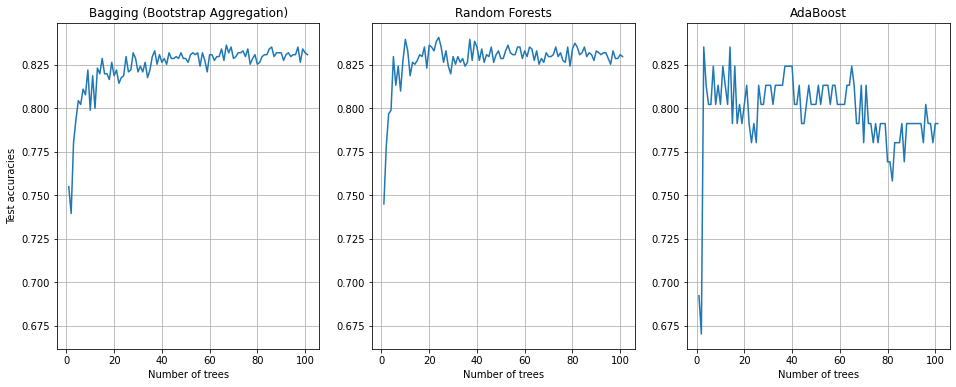

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,6))
ax[0].set_title("Bagging (Bootstrap Aggregation)")
ax[1].set_title("Random Forests")
ax[2].set_title("AdaBoost")
for i,acc in enumerate([accuracy1, accuracy2, accuracy3]):
    ax[i].plot(noT, acc)
    ax[i].yaxis.set_tick_params(labelleft=True)
    ax[i].set_xlabel("Number of trees")
    if i == 0: ax[i].set_ylabel("Test accuracies")
    ax[i].grid()


According to the graphs, AdaBoost has the least test accuracy for this dataset, Bagging and Random Forests have similar accuracy.